In [ ]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

In [ ]:
data=pd.read_excel("Telco_customer_churn.xlsx")
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
data.drop(['Count','CustomerID','City','Country','State','Zip Code','Lat Long','Latitude','Longitude','Churn Reason',],axis=1,inplace=True)

In [ ]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
data.isnull().sum()

Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Score           0
CLTV                  0
dtype: int64

In [ ]:
data.loc[data['Total Charges'].isnull() == True]

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
2234,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578
2438,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0,68,5504
2568,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0,45,2048
2667,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0,48,4950
2856,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740
4331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0,53,2019
4687,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0,49,2299
5104,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0,27,3763
5719,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890
6772,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0,44,2342


In [ ]:
#Removing missing values 
data.dropna(how = 'any', inplace = True)

In [ ]:
data.drop('Churn Label',axis=1,inplace=True)

In [ ]:
categorical_var = list(data.dtypes.loc[data.dtypes == 'object'].index)
print(len(categorical_var))
print(categorical_var)

16
['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


In [ ]:
continuous_var = ['Tenure Months','Monthly Charges','Total Charges','Churn Score','CLTV']
data.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785,58.715301,4401.445108
std,24.545260,30.085974,2266.771362,0.441782,21.531321,1182.414266
min,1.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,9.000000,35.587500,401.450000,0.000000,40.000000,3469.750000
50%,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.500000
75%,55.000000,89.862500,3794.737500,1.000000,75.000000,5381.000000
max,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


#Model Selection

#create dummy
ตัวแปรที่เป็นคุณภาพ เพื่อให้สามารถดูความสัมพันธ์กับ Churn Value ได้

In [ ]:
cat_vars=['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=data[to_keep]
data_final.columns.values

array(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Gender_Female', 'Gender_Male',
       'Senior Citizen_No', 'Senior Citizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'Phone Service_No', 'Phone Service_Yes', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No', 'Streaming Movies_No internet servi

In [ ]:
data_final

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,1,86,3239,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,2,70.70,151.65,1,67,2701,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,8,99.65,820.50,1,86,5372,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3,28,104.80,3046.05,1,84,5003,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,49,103.70,5036.30,1,89,5340,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,45,5306,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0
7039,24,84.80,1990.50,0,59,2140,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7040,72,103.20,7362.90,0,71,5560,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7041,11,29.60,346.45,0,59,2793,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


# resampling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X = data_final.loc[:, data_final.columns != 'Churn Value']
y = data_final.loc[:, data_final.columns == 'Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [ ]:
data_dummy=X_train.drop(['Tenure Months','Monthly Charges','Total Charges','Churn Score','CLTV'],axis=1)
data_dummy

,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
877,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
5790,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1
6498,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
878,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2783,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
3932,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5964,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0
6947,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0


#normalized

In [ ]:
#mean normalization
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
       
    return X_norm, mu, sigma

In [ ]:
#Compute the mean and std to be used for later scaling
X_train,mu,sigma = featureNormalize(X_train.iloc[:, 0:5])
X_poly_test = (X_test-mu)/sigma
X_train

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
877,-1.277879,0.680026,-0.968842,1.906216,-1.767326
5790,0.956423,0.821231,1.172153,-0.433247,1.318698
6498,0.265820,1.163445,0.680659,0.254830,0.876625
878,-1.156008,-0.469548,-0.901061,1.447498,0.835897
2783,-0.790395,-1.512802,-0.887579,-0.983709,-0.510685
...,...,...,...,...,...
79,-1.115385,0.518886,-0.823646,0.484189,1.115056
3932,-1.156008,0.502274,-0.858571,0.392446,-1.754598
5964,1.606401,1.708329,2.751366,0.713548,1.773498
6947,1.525154,1.648525,2.460731,0.300702,0.859655


In [ ]:
X_train=pd.concat([X_train, data_dummy], axis=1)
X_train.drop(columns=["Churn Score","CLTV"],inplace=True)
X_train

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
877,-1.277879,0.680026,-0.968842,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
5790,0.956423,0.821231,1.172153,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1
6498,0.265820,1.163445,0.680659,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
878,-1.156008,-0.469548,-0.901061,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2783,-0.790395,-1.512802,-0.887579,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-1.115385,0.518886,-0.823646,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
3932,-1.156008,0.502274,-0.858571,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5964,1.606401,1.708329,2.751366,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0
6947,1.525154,1.648525,2.460731,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0


#RFE
ใช้ RFE ในการเลือกตัวแปรอิสระเข้า Model

In [ ]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Select best feature 
rfe = RFE(logreg, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train.values.ravel())

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[ True False  True False False False False  True False  True  True False
 False  True False False False  True False  True False False False False
 False False False False  True False False False False  True False False
  True  True False  True  True False False False  True False]
[ 1  2  1 32 30 27 29  1  8  1  1 25 19  1 26 18  4  1  6  1  3 14 20 13
 21 28 12 15  1  5 11 17  9  1 16 10  1  1 31  1  1  7 24 23  1 22]


In [ ]:
X_train.columns[rfe.support_]  
#ตัวแปรอิสระ 15 ตัวที่ถูกเลือก
#เอาตัวแปรอิสระ 15 ตัวที่ถูกเลือก มาพิจารณาต่อ ด้วยการดูค่า p-value

Index(['Tenure Months', 'Total Charges', 'Partner_No', 'Dependents_No',
       'Dependents_Yes', 'Multiple Lines_No', 'Internet Service_Fiber optic',
       'Online Security_No', 'Tech Support_No', 'Streaming TV_Yes',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_Two year',
       'Paperless Billing_No', 'Payment Method_Electronic check'],
      dtype='object')

#Implementing the model

In [ ]:
cols=['Tenure Months', 'Total Charges', 'Partner_No', 'Dependents_No',
       'Dependents_Yes', 'Multiple Lines_No', 'Internet Service_Fiber optic',
       'Online Security_No', 'Tech Support_No', 'Streaming TV_Yes',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_Two year',
       'Paperless Billing_No', 'Payment Method_Electronic check']
Xs=X_train[cols]
ys=y_train['Churn Value']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(ys,Xs)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.392984
         Iterations 8
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.320    
Dependent Variable:       Churn Value           AIC:                   3898.5328
Date:                     2022-05-06 09:59      BIC:                   3996.0549
No. Observations:         4922                  Log-Likelihood:        -1934.3  
Df Model:                 14                    LL-Null:               -2844.7  
Df Residuals:             4907                  LLR p-value:           0.0000   
Converged:                1.0000                Scale:                 1.0000   
No. Iterations:           8.0000                                                
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------

In [ ]:
#ตัวแปรอิสระ 15 ตัวนี้มีค่า p-value < 0.05 significant ทุกตัว

#Logistic Regression Model Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

cols=['Tenure Months', 'Total Charges', 'Partner_No', 'Dependents_No',
       'Dependents_Yes', 'Multiple Lines_No', 'Internet Service_Fiber optic',
       'Online Security_No', 'Tech Support_No', 'Streaming TV_Yes',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_Two year',
       'Paperless Billing_No', 'Payment Method_Electronic check']
X=data_final[cols]
y=data_final['Churn Value']

#สร้าง X,y ใหม่ โดยให้ X เป็นเฉพาะคอลัมน์ที่ถูกเลือก

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

#model evaluation

In [ ]:
#model evaluation
y_pred= logreg.predict(X_test)
print('Training Accuracy: {:.2f} %'.format(np.mean(logreg.predict(X_train) == y_train) * 100))
print('Test Accuracy: {:.2f} %'.format(np.mean(y_pred == y_test) * 100))
print('Expected accuracy (fullmodel) :  80 %')

# จากการสังเกตุ accuracy ที่ training set  พบว่า Model ไม่ประสบปัญหาอะไร จึงนำไป confirm กับ test set ต่อไป

Training Accuracy: 81.78 %
Test Accuracy: 80.47 %
Expected accuracy (fullmodel) :  80 %


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))
print('accuracy score is: ', accuracy_score(y_test,y_pred))
print('roc auc score is: ', roc_auc_score(y_test,y_pred))
print('precision score is: ',precision_score(y_test,y_pred))
print('recall score is: ', recall_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.80
accuracy score is:  0.804739336492891
roc auc score is:  0.7238930134202383
precision score is:  0.6645299145299145
recall score is:  0.549469964664311
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1544
           1       0.66      0.55      0.60       566

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.74      2110
weighted avg       0.80      0.80      0.80      2110



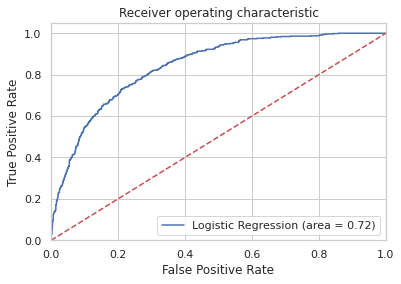

In [ ]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


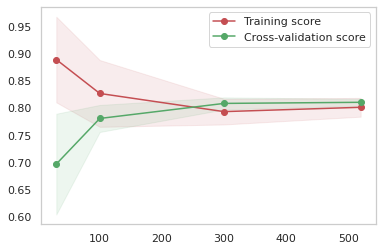

In [ ]:
#learnning curve
train_sizes, train_scores, test_scores = learning_curve(logreg,X_train, y_train, cv = 3, train_sizes = [1, 30,100,300,520])
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1,
                  color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
          label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
          label="Cross-validation score")

plt.legend(loc="best")

#Improvement

In [ ]:
def evaluate_model(cv):
  # get the model
  model = LogisticRegression(solver = 'liblinear',max_iter=100)
  # evaluate the model
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # return scores
  return mean(scores), scores.min(), scores.max()

folds = range(2,31)
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=10)
    # record mean and min/max of each set of results
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('-> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))

-> folds=2, accuracy=0.810 (0.802,0.818)
-> folds=3, accuracy=0.811 (0.799,0.818)
-> folds=4, accuracy=0.810 (0.790,0.823)
-> folds=5, accuracy=0.809 (0.797,0.820)
-> folds=6, accuracy=0.809 (0.792,0.818)
-> folds=7, accuracy=0.811 (0.791,0.826)
-> folds=8, accuracy=0.812 (0.790,0.832)
-> folds=9, accuracy=0.811 (0.792,0.823)
-> folds=10, accuracy=0.812 (0.791,0.826)
-> folds=11, accuracy=0.811 (0.775,0.831)
-> folds=12, accuracy=0.811 (0.775,0.831)
-> folds=13, accuracy=0.813 (0.774,0.847)
-> folds=14, accuracy=0.812 (0.777,0.841)
-> folds=15, accuracy=0.812 (0.772,0.848)
-> folds=16, accuracy=0.811 (0.770,0.841)
-> folds=17, accuracy=0.811 (0.771,0.848)
-> folds=18, accuracy=0.808 (0.772,0.846)
-> folds=19, accuracy=0.811 (0.768,0.838)
-> folds=20, accuracy=0.811 (0.770,0.832)
-> folds=21, accuracy=0.810 (0.779,0.851)
-> folds=22, accuracy=0.811 (0.772,0.841)
-> folds=23, accuracy=0.812 (0.775,0.859)
-> folds=24, accuracy=0.812 (0.758,0.860)
-> folds=25, accuracy=0.811 (0.752,0.854)


In [ ]:
# Model Improvement
#Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
start_time = datetime.now()

# define model/create instance
lr=LogisticRegression(solver = 'liblinear',max_iter=100)

#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)

#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 
        'penalty': ['l2'],
        "class_weight":[{0:x ,1:1.0 -x} for x in weights]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,
                    param_grid=param, 
                    scoring="f1",
                    cv=folds,return_train_score=True)

#train model to learn relationships between x and y
model.fit(X_train,y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

KeyboardInterrupt: ignored

In [ ]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

AttributeError: ignored

In [ ]:
#Building Model again with best params
lr3=LogisticRegression(class_weight={0:0.48,1:0.64},C=20,penalty="l2")
lr3.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=20, class_weight={0: 0.48, 1: 0.64})

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


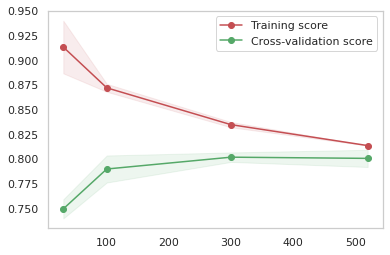

In [ ]:
# re-evaluate
train_sizes, train_scores, test_scores = learning_curve(lr3,X_train, y_train, cv = 5, train_sizes = [1, 30,100,300,520])
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1,
                  color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
          label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
          label="Cross-validation score")

plt.legend(loc="best")

In [ ]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr3.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr3.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")
# Accuracy score
print('accuracy score is: ', accuracy_score(y_test,y_pred_test))
# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  t", f1_score(y_test,y_pred_test))

confusion Matrix is :nn [[1313  231]
 [ 205  361]]
n
accuracy score is:  0.7933649289099526
ROC-AUC score  test dataset:  t 0.8418230148849302
precision score  test dataset:  t 0.6097972972972973
Recall score  test dataset:  t 0.6378091872791519
f1 score  test dataset :  t 0.6234887737478411


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1544
           1       0.61      0.64      0.62       566

    accuracy                           0.79      2110
   macro avg       0.74      0.74      0.74      2110
weighted avg       0.80      0.79      0.79      2110



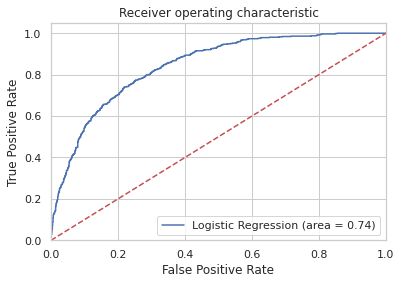

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
implogit_roc_auc = roc_auc_score(y_test, lr3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % implogit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Prediction

In [ ]:
pd.options.display.max_columns = None
data_final

In [ ]:
X.columns

In [ ]:
# give column name
col_name = 'Payment Method_Electronic check'
# find the index no
index_no = data_final.columns.get_loc(col_name)
  
print("Index of {} column in given dataframe is : {}".format(col_name, index_no))

customer no.14

In [ ]:
data_final.iloc[14,[0,2,10,12,13,16,20,22,31,36,39,40,42,43,47]]

In [ ]:
print("actual churn is ",data_final.iloc[14,3])
p = list(data_final.iloc[14,[0,2,10,12,13,16,20,22,31,36,39,40,42,43,47]])
p = pd.DataFrame(data=p)
p = p.T
output = lr3.predict(p)
print('predict churn is ', output[0])

customer no.7014

In [ ]:
data_final.iloc[7014,[0,2,10,12,13,16,20,22,31,36,39,40,42,43,47]]

In [ ]:
print("actual churn is ",data_final.iloc[7014,3])
p = list(data_final.iloc[7014,[0,2,10,12,13,16,20,22,31,36,39,40,42,43,47]])
p = pd.DataFrame(data=p)
p = p.T
output = lr3.predict(p)
print('predict churn is ', output[0])

customer no.555

In [ ]:
data_final.iloc[555,[0,2,10,12,13,16,20,22,31,36,39,40,42,43,47]]

In [ ]:
print("actual churn is ",data_final.iloc[555,3])
p = list(data_final.iloc[555,[0,2,10,12,13,16,20,22,31,36,39,40,42,43,47]])
p = pd.DataFrame(data=p)
p = p.T
output = lr3.predict(p)
print('predict churn is ', output[0])

customer no.678

In [ ]:
data_final.iloc[678,[0,2,10,12,13,16,20,22,31,36,39,40,42,43,47]]

In [ ]:
print("actual churn is ",data_final.iloc[678,3])
p = list(data_final.iloc[678,[0,2,10,12,13,16,20,22,31,36,39,40,42,43,47]])
p = pd.DataFrame(data=p)
p = p.T
output = lr3.predict(p)
print('predict churn is ', output[0])